# **WALMART BUSINESS CASE STUDY**

## **PROBLEM STATEMENT : Walmart Black Friday Purchase Analysis**

**Objective**: Analyze customer purchase behavior during Black Friday to understand spending patterns across different segments.

**Gender Focus**: Determine whether women spend more than men per transaction.

**Other Segments**: Examine how marital status (married vs unmarried) and age groups influence purchase amounts.

**Methodology**: Use transactional data to compute average spending, confidence intervals, and segment-wise trends.

**Business Impact**: Provide actionable insights to help Walmart optimize marketing strategies, promotions, and inventory planning for better business decisions.

## **MODULES' IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

## **DATA IMPORT**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2025-09-29 11:47:43--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M   141MB/s    in 0.2s    

2025-09-29 11:47:43 (141 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv('walmart_data.csv?1641285094')
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
310776,1005889,P00256642,M,51-55,20,C,1,1,5,5443
350998,1000033,P00273442,M,46-50,3,A,1,1,12,1395
242567,1001383,P00214142,F,26-35,7,A,1,0,8,5853
282537,1001519,P00116842,M,18-25,4,C,1,0,2,16498
407846,1002811,P0097742,M,26-35,19,B,1,0,8,5922


**We observe a population of ~550k male and female customers. Considering this as a substantially large population, inferences from the samples are valid provided they are random and independent.**

## **EXPLORATORY DATA ANALYTICS**

### **Data Overview**

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum() # NO NULL VALUES

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df[df.duplicated()].shape # NO DUPLICATE ROWS

(0, 10)

In [ ]:
df['Gender'].unique(),df['Occupation'].unique(),df['City_Category'].unique(),df['Marital_Status'].unique(),df['Product_Category'].unique()

(array(['F', 'M'], dtype=object),
 array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 array(['A', 'C', 'B'], dtype=object),
 array([0, 1]),
 array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
         9, 20, 19]))

**Converting categories to category dtype:**

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('category')

In [ ]:
print("Gender codes: ",df["Gender"].cat.codes.unique())
print("Occupation codes: ",df["Occupation"].cat.codes.unique())
print("City_Category codes: ",df["City_Category"].cat.codes.unique())
print("Marital_Status codes: ",df["Marital_Status"].cat.codes.unique())
print("Product_Category codes: ",df["Product_Category"].cat.codes.unique())

Gender codes:  [0 1]
Occupation codes:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category codes:  [0 2 1]
Marital_Status codes:  [0 1]
Product_Category codes:  [ 2  0 11  7  4  3  1  5 13 10 12 14  6 15 17  9 16  8 19 18]


**Converting Age to ordered categorical dtype:** Sorting will follow life stages, not alphabet (string values)

In [ ]:
print(df['Age'].unique())
df['Age'].dtype

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


dtype('O')

In [ ]:
age_order = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

In [ ]:
print("Age codes: ",df["Age"].cat.codes.unique())

Age codes:  [0 6 2 4 5 3 1]


### **Statistical Summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
cat_cols = ['Gender','Age','City_Category','Marital_Status']
df[cat_cols].melt().groupby(['variable','value'])[['value']].count()/len(df)*100

value
variable       value           
Age            0-17    2.745479
               18-25  18.117760
               26-35  39.919974
               36-45  19.999891
               46-50   8.308246
               51-55   6.999316
               55+     3.909335
City_Category  A      26.854862
               B      42.026259
               C      31.118880
Gender         F      24.689493
               M      75.310507
Marital_Status 0      59.034701
               1      40.965299

- 60% of the users fall within the age bracket of 26–45 years, which shows that the majority of Walmart’s customers are young to middle-aged adults.
- 42% of the users belong to City Category B, suggesting that this city type contributes the largest share of customers.
- 75% of the users are male, indicating that the customer base is heavily dominated by men.
- 60% of the users are single, highlighting that unmarried individuals form the majority of Walmart’s customer base.

### **Visualizing Univariate Distributions**

#### **Visualizing Continuous Variables**

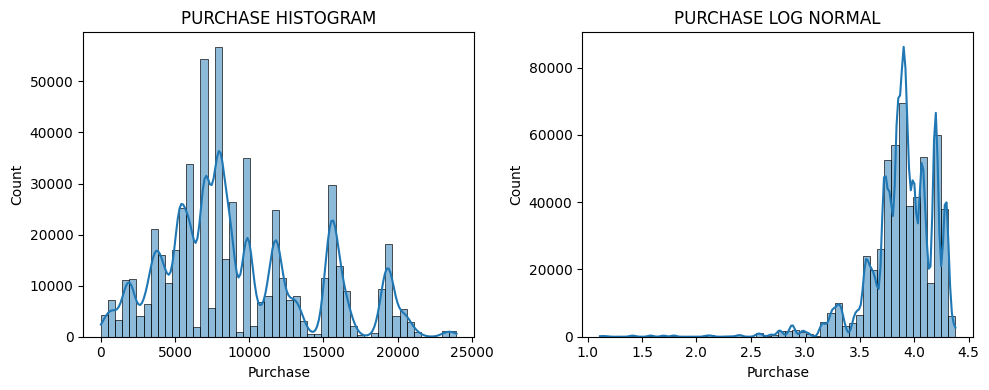

In [ ]:
fig,axis = plt.subplots(1,2,figsize=(10,4))
sns.histplot(data=df,x='Purchase',ax=axis[0],bins=50,kde=True)
axis[0].set_title('PURCHASE HISTOGRAM')
sns.histplot(np.log10(df['Purchase']+1),ax=axis[1],bins=50,kde=True)
axis[1].set_title('PURCHASE LOG NORMAL')
plt.tight_layout()
plt.show()

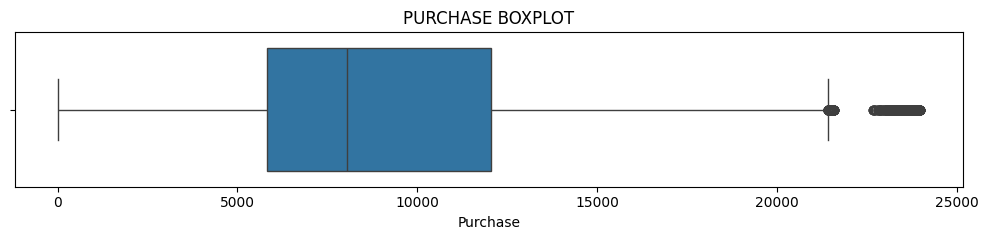

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,2.5))
sns.boxplot(x=df['Purchase'])
plt.title('PURCHASE BOXPLOT')
plt.tight_layout()
plt.show()

In [ ]:
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]

print("Number of outliers:",len(outliers))
print("Percentage of outliers:",(len(outliers)/len(df))*100)

Number of outliers: 2677
Percentage of outliers: 0.4866671029763593


#### **Visualizing Categorical Variables**

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

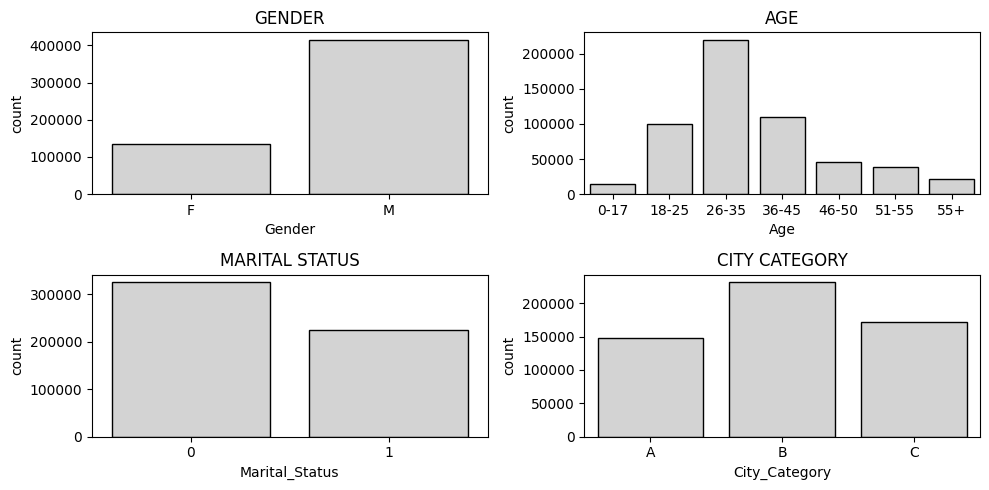

In [ ]:
fig,axis = plt.subplots(2,2,figsize=(10,5))
sns.countplot(data=df,x='Gender',ax=axis[0,0],color='lightgrey',edgecolor='black')
axis[0,0].set_title('GENDER')
sns.countplot(data=df,x='Age',ax=axis[0,1],color='lightgrey',edgecolor='black')
axis[0,1].set_title('AGE')
sns.countplot(data=df,x='Marital_Status',ax=axis[1,0],color='lightgrey',edgecolor='black')
axis[1,0].set_title('MARITAL STATUS')
sns.countplot(data=df,x='City_Category',ax=axis[1,1],color='lightgrey',edgecolor='black')
axis[1,1].set_title('CITY CATEGORY')
plt.tight_layout()
plt.show()

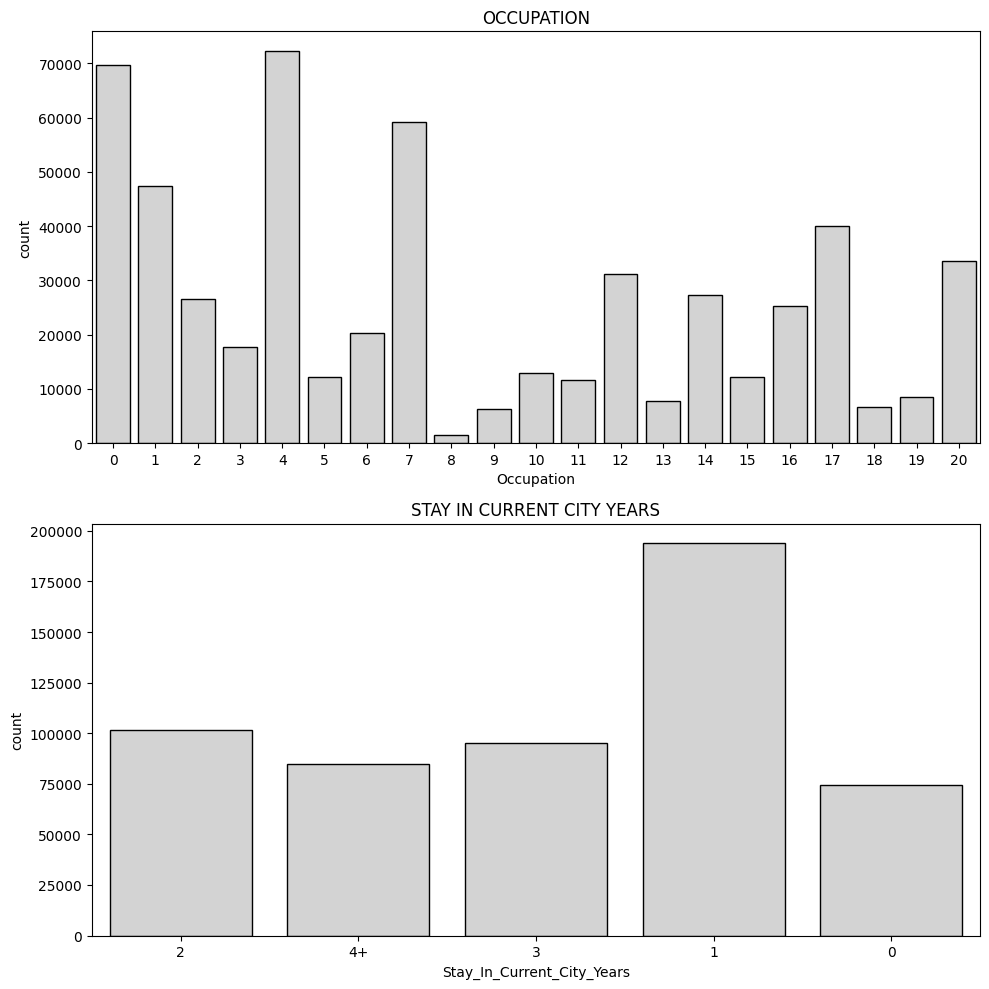

In [ ]:
fig,axis = plt.subplots(2,1,figsize=(10,10))
sns.countplot(data=df,x='Occupation',ax=axis[0],color='lightgrey',edgecolor='black')
axis[0].set_title('OCCUPATION')
sns.countplot(data=df,x='Stay_In_Current_City_Years',ax=axis[1],color='lightgrey',edgecolor='black')
axis[1].set_title('STAY IN CURRENT CITY YEARS')
plt.tight_layout()
plt.show()

### **Bivariate Analysis**

---
---

#### **Purchase vis-a-vis Gender**

---
---

In [ ]:
df.groupby('Gender')['Purchase'].describe()

/tmp/ipython-input-1243678314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


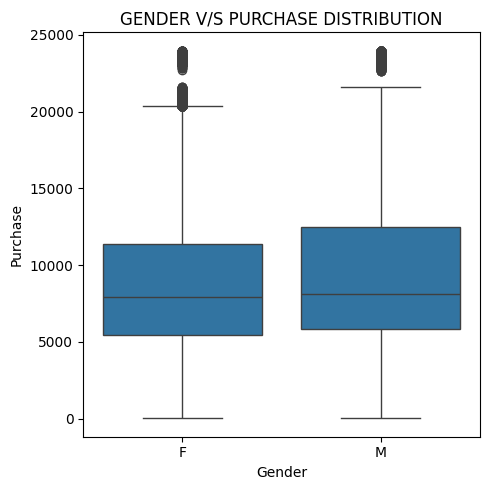

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(data=df,x='Gender',y='Purchase',ax=axis)
axis.set_title('GENDER V/S PURCHASE DISTRIBUTION')
plt.tight_layout()
plt.show()

**Population Distribution Analysis**

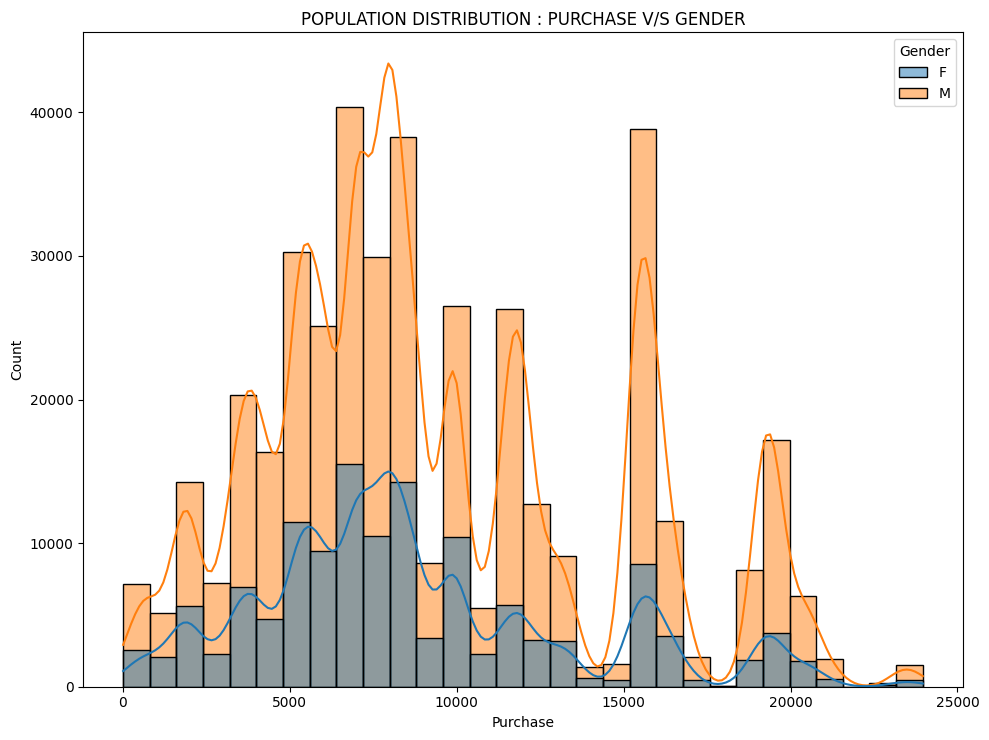

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,7.5))
sns.histplot(data=df,x='Purchase',bins=30,kde=True,hue='Gender',ax=axis)
plt.title('POPULATION DISTRIBUTION : PURCHASE V/S GENDER')
plt.tight_layout()
plt.show()

Notes: The distribution appears roughly normal, though an outlier is evident around 15,000

**Population Mean Analysis**

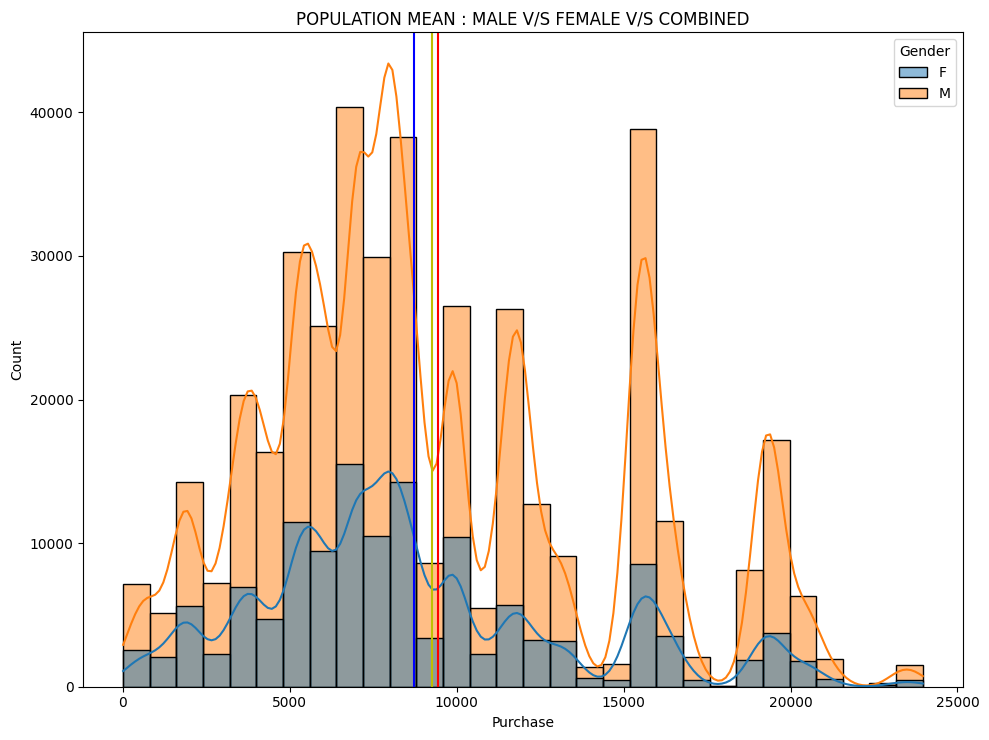

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,7.5))
sns.histplot(data=df,x='Purchase',bins=30,kde=True,hue='Gender',ax=axis)
plt.axvline(x=df['Purchase'].mean(),color='y')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(),color='r')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(),color='b')
plt.title('POPULATION MEAN : MALE V/S FEMALE V/S COMBINED')
plt.tight_layout()
plt.show()

Notes: The mean spending for males, females, and the overall sample is similar, with females spending slightly less

**SAMPLE-DERIVED GENDER-CENTRIC ANALYSIS USING 1000 SAMPLE POINTS**

**FEMALES**

In [ ]:
df_f = df[df['Gender']=='F']
print("Mean of Purchase Amount by Females:",df_f['Purchase'].mean())
print("Standard Deviation of Purchase Amount by Females:",df_f['Purchase'].std())

Mean of Purchase Amount by Females: 8734.565765155476
Standard Deviation of Purchase Amount by Females: 4767.233289291444


In [ ]:
sample_mean_of_purchase_by_females = []
for i in range(1000):
  sample_f = df_f['Purchase'].sample(n=7500)
  sample_f_mean = sample_f.mean()
  sample_mean_of_purchase_by_females.append(sample_f_mean)
sample_mean_of_purchase_by_females = np.array(sample_mean_of_purchase_by_females)

sample_mean_of_purchase_by_females[:10]

array([8775.50546667, 8680.09173333, 8838.23413333, 8733.1336    ,
       8767.11706667, 8769.03186667, 8776.6692    , 8729.47586667,
       8778.35293333, 8807.84386667])

**MALES**

In [ ]:
df_m = df[df['Gender']=='M']
print("Mean of Purchase Amount by Males:",df_m['Purchase'].mean())
print("Standard Deviation of Purchase Amount by Males:",df_m['Purchase'].std())

Mean of Purchase Amount by Males: 9437.526040472265
Standard Deviation of Purchase Amount by Males: 5092.186209777949


In [ ]:
sample_mean_of_purchase_by_males = []
for i in range(1000):
  sample_m = df_m['Purchase'].sample(n=7500)
  sample_m_mean = sample_m.mean()
  sample_mean_of_purchase_by_males.append(sample_m_mean)
sample_mean_of_purchase_by_males = np.array(sample_mean_of_purchase_by_males)

sample_mean_of_purchase_by_males[:10]

array([9342.21493333, 9356.6844    , 9512.2004    , 9471.31453333,
       9380.058     , 9461.36      , 9456.962     , 9415.81666667,
       9466.61493333, 9436.20933333])

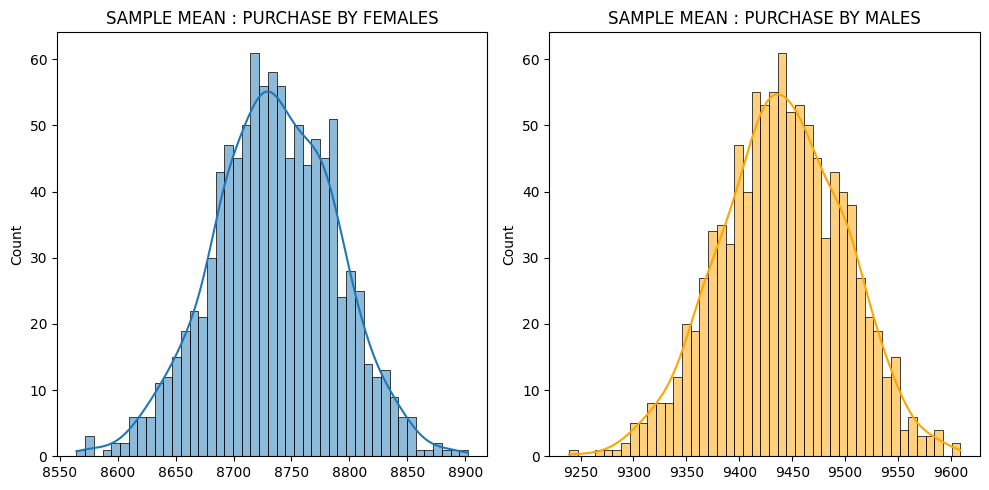

In [ ]:
fig,axis = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=sample_mean_of_purchase_by_females,bins=45,kde=True,ax=axis[0])
axis[0].set_title('SAMPLE MEAN : PURCHASE BY FEMALES')
sns.histplot(data=sample_mean_of_purchase_by_males,bins=45,kde=True,ax=axis[1],color='orange')
axis[1].set_title('SAMPLE MEAN : PURCHASE BY MALES')
plt.tight_layout()
plt.show()

**SAMPLE DISTRIBUTION MEANS:**

In [ ]:
print("Sample Mean of Purchase Amount by Females:",sample_mean_of_purchase_by_females.mean())
print("Sample Mean of Purchase Amount by Males:",sample_mean_of_purchase_by_males.mean())

Sample Mean of Purchase Amount by Females: 8735.427967733334
Sample Mean of Purchase Amount by Males: 9440.581635066666


The mean of this sampling distribution was found to be very close to the original population mean.

**Females**

- Population mean = 8734.56

- Sampling distribution mean = 8735.42

**Males**

- Population mean = 9437.52

- Sampling distribution mean = 9440.58



**This justifies the first property of the Central Limit Theorem:**
Sampling Distribution Mean

≈

Population Mean

---

**ESTIMATION OF THE 95% CONFIDENCE INTERVAL**

In [ ]:
from scipy.stats import norm

**FEMALES**

In [ ]:
mu = df_f['Purchase'].mean()
sigma = df_f['Purchase'].std()
n = len(df_f)
alpha = 0.05
se = sigma/np.sqrt(n)
z1 = norm.ppf(alpha/2)
z2 = norm.ppf(1-alpha/2)
x1 = z1*se + mu
x2 = z2*se + mu
print("Confidence Interval for Females:",(x1,x2))

Confidence Interval for Females: (np.float64(8709.21154714068), np.float64(8759.919983170272))


**MALES**

In [ ]:
mu = df_m['Purchase'].mean()
sigma = df_m['Purchase'].std()
n = len(df_m)
alpha = 0.05
se = sigma/np.sqrt(n)
z1 = norm.ppf(alpha/2)
z2 = norm.ppf(1-alpha/2)
x1 = z1*se + mu
x2 = z2*se + mu
print("Confidence Interval for Males:",(x1,x2))

Confidence Interval for Males: (np.float64(9422.01944736257), np.float64(9453.032633581959))


The **95% confidence intervals** in each case included the true population values — **consistent with the Central Limit Theorem**.

**Numerical column v/s categorical column with two unique entries => Independent Samples T-test**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# H0 : Purchase amount in independent of Gender
# H1 : Purchase amount in dependent on Gender

sample_size = 10000

male_sample = df[df['Gender'] == 'M']['Purchase'].sample(n=sample_size, random_state=42)
female_sample = df[df['Gender'] == 'F']['Purchase'].sample(n=sample_size, random_state=42)

result = ttest_ind(male_sample, female_sample, alternative='two-sided')
alpha = 0.05

if result.pvalue < alpha:
    print("Reject Null Hypothesis")
    print("Gender has a significant impact on Purchase Amount\n")
else:
    print("Fail to Reject Null Hypothesis")
    print("Gender has no significant impact on Purchase Amount\n")

result

Reject Null Hypothesis
Gender has a significant impact on Purchase Amount



TtestResult(statistic=np.float64(10.842139195163371), pvalue=np.float64(2.5889036301871065e-27), df=np.float64(19998.0))

---
---

#### **Purchase vis-a-vis Marital Status**

---
---

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

/tmp/ipython-input-3740306556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Marital_Status')['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


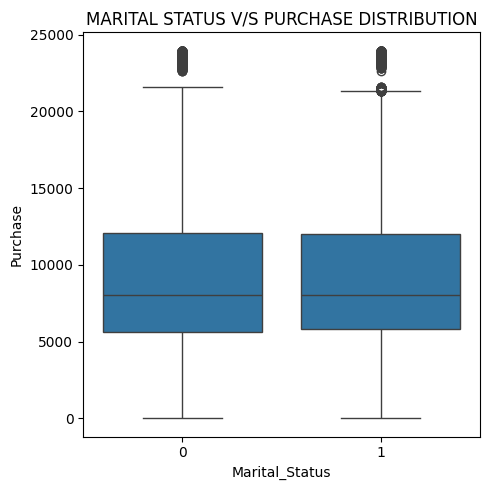

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(data=df,x='Marital_Status',y='Purchase',ax=axis)
axis.set_title('MARITAL STATUS V/S PURCHASE DISTRIBUTION')
plt.tight_layout()
plt.show()

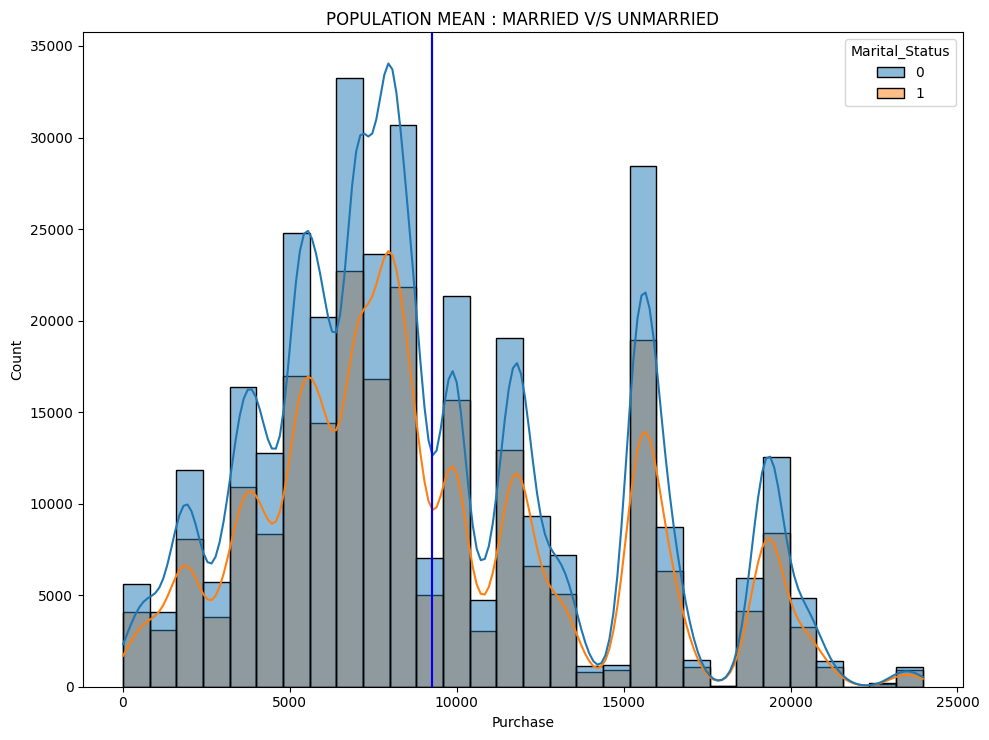

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,7.5))
sns.histplot(data=df,x='Purchase',bins=30,kde=True,hue='Marital_Status',ax=axis)
plt.axvline(x=df['Purchase'].mean(),color='y')
plt.axvline(x=df[df['Marital_Status']==0]['Purchase'].mean(),color='r')
plt.axvline(x=df[df['Marital_Status']==1]['Purchase'].mean(),color='b')
plt.title('POPULATION MEAN : MARRIED V/S UNMARRIED')
plt.tight_layout()
plt.show()

Notes: The distribution appears roughly normal, though outliers are evident around 15,000 and 20,000

**SAMPLE-DERIVED GENDER-CENTRIC ANALYSIS USING 1000 SAMPLE POINTS**

**MARRIED**

In [ ]:
df_married = df[df['Marital_Status']==1]
print("Mean of Purchase Amount by Married People:",df_married['Purchase'].mean())
print("Standard Deviation of Purchase Amount by Married People:",df_married['Purchase'].std())

sample_mean_of_purchase_by_married = []
for i in range(1000):
  sample_m = df_married['Purchase'].sample(n=7500)
  sample_m_mean = sample_m.mean()
  sample_mean_of_purchase_by_married.append(sample_m_mean)
sample_mean_of_purchase_by_married = np.array(sample_mean_of_purchase_by_married)

sample_mean_of_purchase_by_married[:5]

Mean of Purchase Amount by Married People: 9261.174574082374
Standard Deviation of Purchase Amount by Married People: 5016.89737779313


array([9307.33933333, 9249.242     , 9216.6016    , 9236.61186667,
       9303.73493333])

**UNMARRIED**

In [ ]:
df_unmarried = df[df['Marital_Status']==0]
print("Mean of Purchase Amount by Unmarried People:",df_unmarried['Purchase'].mean())
print("Standard Deviation of Purchase Amount by Unmarried People:",df_unmarried['Purchase'].std())

sample_mean_of_purchase_by_unmarried = []
for i in range(1000):
  sample_u = df_unmarried['Purchase'].sample(n=7500)
  sample_u_mean = sample_u.mean()
  sample_mean_of_purchase_by_unmarried.append(sample_u_mean)
sample_mean_of_purchase_by_unmarried = np.array(sample_mean_of_purchase_by_unmarried)

sample_mean_of_purchase_by_unmarried[:5]

Mean of Purchase Amount by Unmarried People: 9265.907618921507
Standard Deviation of Purchase Amount by Unmarried People: 5027.347858674457


array([9259.70173333, 9303.49693333, 9296.08226667, 9255.4528    ,
       9273.15533333])

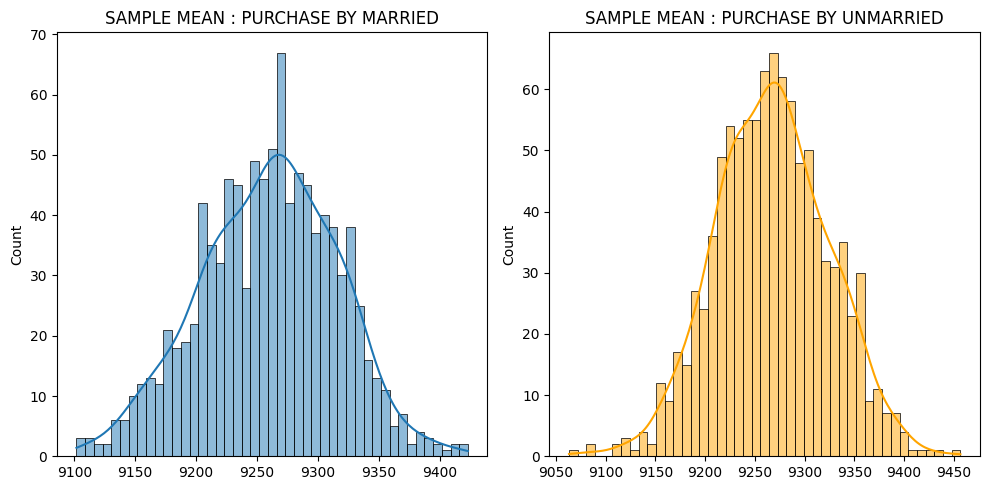

In [ ]:
fig,axis = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=sample_mean_of_purchase_by_married,bins=45,kde=True,ax=axis[0])
axis[0].set_title('SAMPLE MEAN : PURCHASE BY MARRIED')
sns.histplot(data=sample_mean_of_purchase_by_unmarried,bins=45,kde=True,ax=axis[1],color='orange')
axis[1].set_title('SAMPLE MEAN : PURCHASE BY UNMARRIED')
plt.tight_layout()
plt.show()

**SAMPLE DISTRIBUTION MEANS:**

In [ ]:
print("Sample Mean of Purchase Amount by the Married:",sample_mean_of_purchase_by_married.mean())
print("Sample Mean of Purchase Amount by the Unmarried:",sample_mean_of_purchase_by_unmarried.mean())

Sample Mean of Purchase Amount by the Married: 9259.6269848
Sample Mean of Purchase Amount by the Unmarried: 9267.197437333334


The mean of this sampling distribution was found to be very close to the original population mean.

**Married**

- Population mean = 9261.17

- Sampling distribution mean = 9259.62

**Unmarried**

- Population mean = 9265.90

- Sampling distribution mean = 9267.19



**This justifies the first property of the Central Limit Theorem:**
Sampling Distribution Mean ≈ Population Mean

---

**ESTIMATION OF THE 95% CONFIDENCE INTERVAL**

In [ ]:
from scipy.stats import norm

**MARRIED**

In [ ]:
mu = df_married['Purchase'].mean()
sigma = df_married['Purchase'].std()
n = len(df_married)
alpha = 0.05
se = sigma/np.sqrt(n)
z1 = norm.ppf(alpha/2)
z2 = norm.ppf(1-alpha/2)
x1 = z1*se + mu
x2 = z2*se + mu
print("Confidence Interval for the Married:",(x1,x2))

Confidence Interval for the Married: (np.float64(9240.460427057078), np.float64(9281.888721107669))


**UNMARRIED**

In [ ]:
mu = df_unmarried['Purchase'].mean()
sigma = df_unmarried['Purchase'].std()
n = len(df_unmarried)
alpha = 0.05
se = sigma/np.sqrt(n)
z1 = norm.ppf(alpha/2)
z2 = norm.ppf(1-alpha/2)
x1 = z1*se + mu
x2 = z2*se + mu
print("Confidence Interval for the Unmarried:",(x1,x2))

Confidence Interval for the Unmarried: (np.float64(9248.61641818668), np.float64(9283.198819656332))


The **95% confidence intervals** in each case included the true population values — **consistent with the Central Limit Theorem**.

In [ ]:
# H0 : Purchase amount in independent of Marital Status
# H1 : Purchase amount in dependent on Marital Status

sample_size = 10000

unmarried_group = df[df['Marital_Status'] == 0]['Purchase'].sample(n=sample_size, random_state=42)
married_group = df[df['Marital_Status'] == 1]['Purchase'].sample(n=sample_size, random_state=42)

result = ttest_ind(unmarried_group, married_group, alternative='two-sided')
alpha = 0.05

if result.pvalue < alpha:
    print("Reject Null Hypothesis")
    print("Marital Status has a significant impact on Purchase Amount\n")
else:
    print("Fail to Reject Null Hypothesis")
    print("Marital Status has no significant impact on Purchase Amount\n")

result

Fail to Reject Null Hypothesis
Marital Status has no significant impact on Purchase Amount



TtestResult(statistic=np.float64(0.5349013930718557), pvalue=np.float64(0.5927239922085221), df=np.float64(19998.0))

---
---

#### **Purchase vis-a-vis Age**

---
---

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


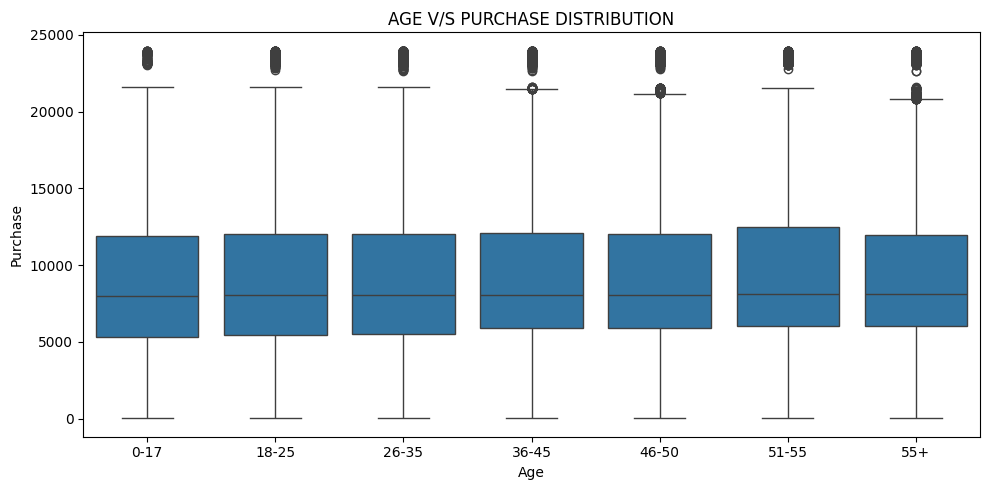

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(data=df,x='Age',y='Purchase',ax=axis)
axis.set_title('AGE V/S PURCHASE DISTRIBUTION')
plt.tight_layout()
plt.show()

- The largest group is 26–35 years, followed by 18–25 years => Mid-career and young adults dominate the dataset
- Mean values rise with age up to the 51–55 group (9534.81, the highest) => Older adults tend to spend more on average
- Standard deviation is roughly the same across all groups (~5000)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# H0 : Purchase amount in independent of Age
# H1 : Purchase amount in dependent on Age

age_groups = [df[df['Age']==age_group]['Purchase'] for age_group in df['Age'].unique()]

result = f_oneway(*age_groups)
# The * before 'age_groups' in the function call unpacks the list of group arrays so that each group is passed as a separate argument
alpha = 0.05

if result.pvalue < alpha:
    print("Reject Null Hypothesis")
    print("Age has a significant impact on Purchase Amount\n")
else:
    print("Fail to Reject Null Hypothesis")
    print("Age has no significant impact on Purchase Amount\n")

result

Reject Null Hypothesis
Age has a significant impact on Purchase Amount



F_onewayResult(statistic=np.float64(40.57579909450407), pvalue=np.float64(1.053563939251671e-49))

---
---
---

## **BUSINESS TAKEAWAY & ACTIONABLE INSIGHTS**

- Target marketing and high-value promotions primarily toward **male and older adult segments** where spending is higher.
- Prioritize **City Category B** for inventory, ads, and store events due to its large customer share.
- **Marital status** can be **deprioritized** in segmentation, as its effect on purchase size is negligible.
- **Age-based marketing (especially for 36+ years)** may yield greater basket sizes and overall sales uplift.

These insights support more precise segmentation for Walmart’s marketing and inventory planning, enhancing effectiveness during future Black Friday and major sales events.

---
---
---